<a href="https://colab.research.google.com/github/dhanushreddy101/Sentiment-Analysis-of-Customer-Reviews-for-Optimized-Product-Recommendations/blob/main/R_ML_60_40_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df = pd.read_csv('/content/Reviews.csv')

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.shape

(568454, 10)

In [ ]:
print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [ ]:
df.dropna(subset=['Summary', 'Text'], how='all', inplace=True)

In [ ]:
df['Summary'] = df['Summary'].fillna('')
df['Text'] = df['Text'].fillna('')

In [ ]:
df.drop_duplicates(subset='Text', inplace=True)

In [ ]:
print("Unique values in Score:", df['Score'].unique())

Unique values in Score: [5 1 4 2 3]


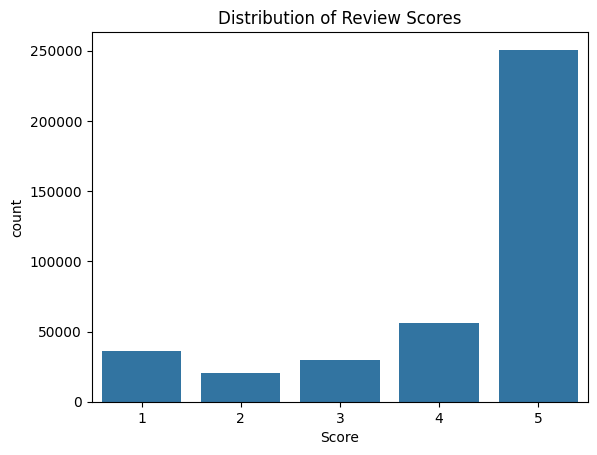

In [ ]:
sns.countplot(x='Score', data=df)
plt.title("Distribution of Review Scores")
plt.show()

In [ ]:
df = df[(df['Score'] >= 1) & (df['Score'] <= 5)]

In [ ]:
print(df[['HelpfulnessNumerator', 'HelpfulnessDenominator']].describe())

       HelpfulnessNumerator  HelpfulnessDenominator
count         393579.000000           393579.000000
mean               1.733535                2.203708
std                6.873517                7.535616
min                0.000000                0.000000
25%                0.000000                0.000000
50%                0.000000                1.000000
75%                2.000000                2.000000
max              866.000000              923.000000


In [ ]:
df = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

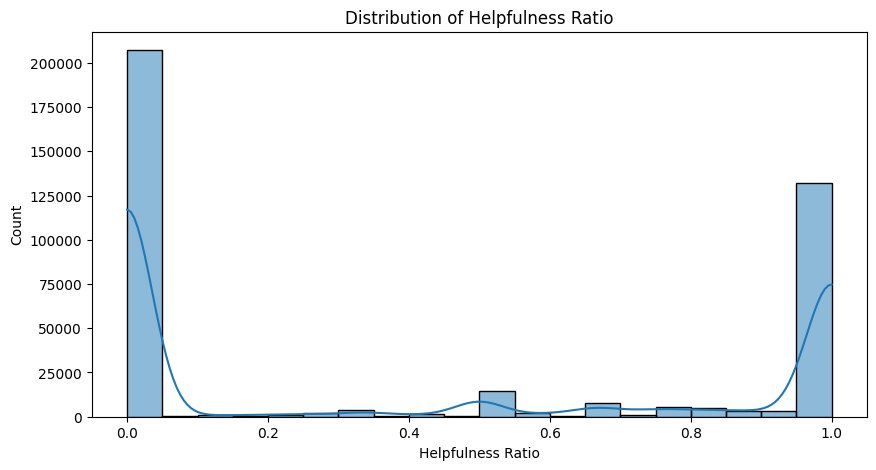

In [ ]:
df['HelpfulnessRatio'] = df.apply(
    lambda row: row['HelpfulnessNumerator'] / row['HelpfulnessDenominator']
    if row['HelpfulnessDenominator'] != 0 else 0, axis=1
)

plt.figure(figsize=(10, 5))
sns.histplot(df['HelpfulnessRatio'], bins=20, kde=True)
plt.title("Distribution of Helpfulness Ratio")
plt.xlabel("Helpfulness Ratio")
plt.show()

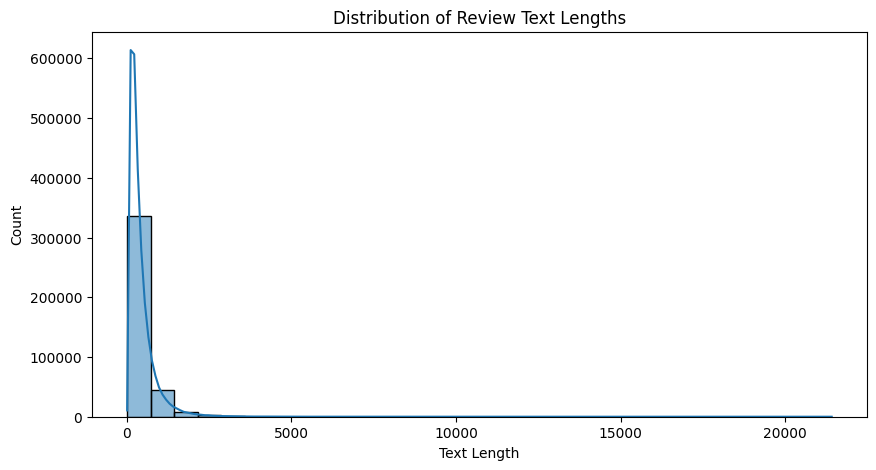

In [ ]:
df['TextLength'] = df['Text'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(df['TextLength'], bins=30, kde=True)
plt.title("Distribution of Review Text Lengths")
plt.xlabel("Text Length")
plt.show()

In [ ]:
def map_sentiment(score):
    if score in [1, 2]:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['Score'].apply(map_sentiment)


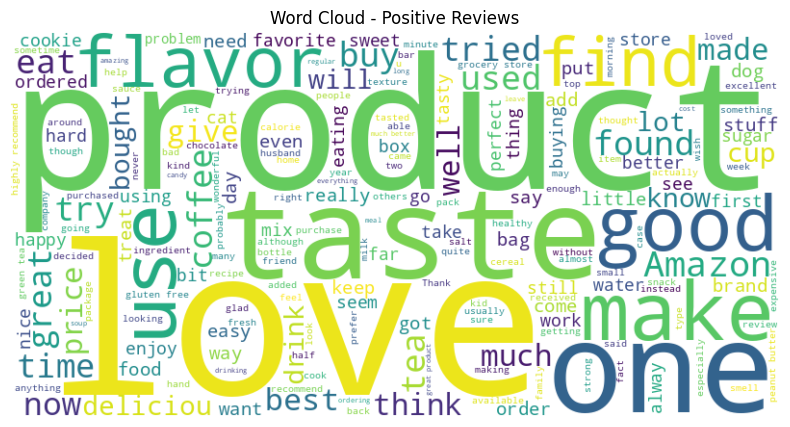

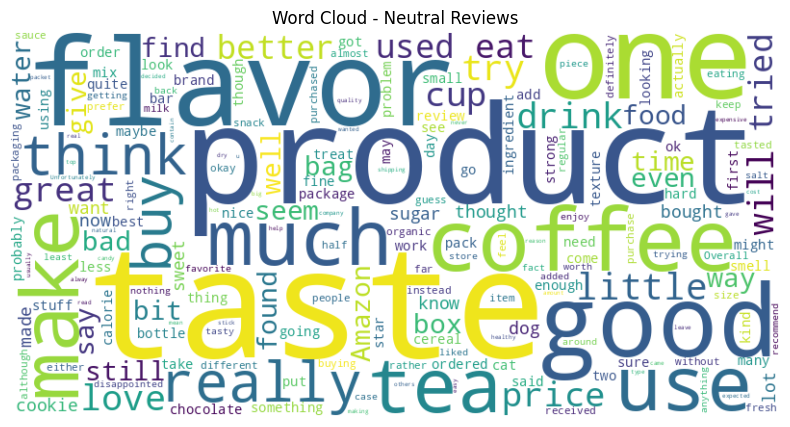

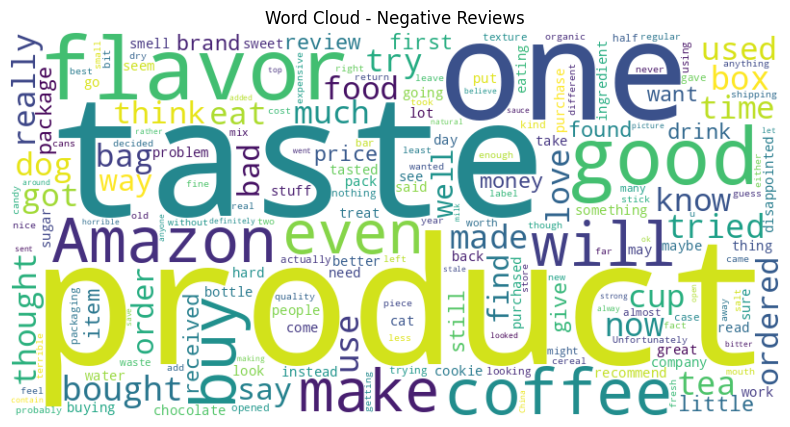

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(sentiment):
    text = " ".join(
        df[df['sentiment'] == sentiment]['Text']
        .str.replace(r'\bbr\b', '', regex=True)
        .str.replace(r'<.*?>', '', regex=True)
    )
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud - {sentiment.capitalize()} Reviews")
    plt.show()


show_wordcloud('positive')
show_wordcloud('neutral')
show_wordcloud('negative')


In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def get_top_words(sentiment, n=15):
    words = " ".join(df[df['sentiment'] == sentiment]['Text']).lower().split()
    words = [word.strip('.,!?()[]') for word in words if word not in stop_words and len(word) > 3]
    common_words = Counter(words).most_common(n)
    print(f"\nTop {n} words in {sentiment} reviews:")
    for word, count in common_words:
        print(f"{word}: {count}")

get_top_words('positive')
get_top_words('neutral')
get_top_words('negative')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top 15 words in positive reviews:
/><br: 129445
like: 122098
good: 106332
great: 100122
taste: 79840
love: 72986
product: 72552
coffee: 71522
flavor: 71284
would: 55022
really: 52284
food: 50165
much: 47004
also: 46372
best: 46256

Top 15 words in neutral reviews:
/><br: 19790
like: 18024
taste: 13430
good: 12620
would: 10847
flavor: 10794
product: 9973
coffee: 9288
much: 7240
really: 6965
little: 5770
better: 5499
great: 5046
food: 4931
also: 4500

Top 15 words in negative reviews:
like: 29572
/><br: 27579
product: 22544
taste: 21486
would: 17833
good: 14073
coffee: 13391
flavor: 13167
even: 10760
food: 10193
really: 9294
much: 9286
amazon: 8722
tried: 7988
bought: 7577


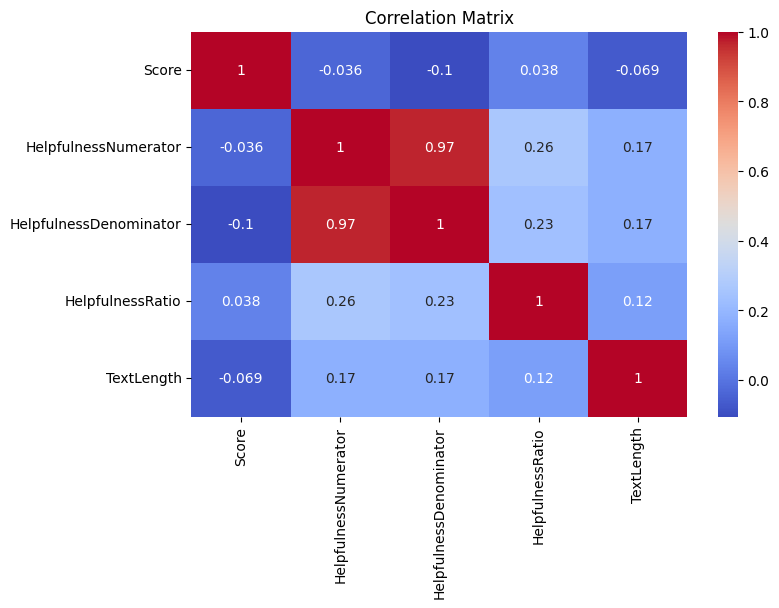

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Score', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'HelpfulnessRatio', 'TextLength']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
df['full_review'] = df['Summary'] + " " + df['Text']


In [ ]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab resource


def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Remove punctuation and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back to string
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
from tqdm import tqdm

tqdm.pandas()
df['cleaned_review'] = df['full_review'].progress_apply(preprocess_text)


100%|██████████| 393577/393577 [53:30<00:00, 122.59it/s]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF matrix
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])

# Target variable
y = df['sentiment']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Report:
               precision    recall  f1-score   support

    negative       0.76      0.70      0.73     22827
     neutral       0.51      0.20      0.28     11902
    positive       0.91      0.97      0.94    122702

    accuracy                           0.87    157431
   macro avg       0.72      0.62      0.65    157431
weighted avg       0.85      0.87      0.86    157431



In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Report:
               precision    recall  f1-score   support

    negative       0.84      0.32      0.47     22827
     neutral       0.60      0.01      0.02     11902
    positive       0.82      0.99      0.90    122702

    accuracy                           0.82    157431
   macro avg       0.76      0.44      0.46    157431
weighted avg       0.81      0.82      0.77    157431



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Report:
               precision    recall  f1-score   support

    negative       0.83      0.45      0.58     22827
     neutral       0.64      0.05      0.09     11902
    positive       0.84      0.99      0.91    122702

    accuracy                           0.84    157431
   macro avg       0.77      0.50      0.53    157431
weighted avg       0.83      0.84      0.80    157431



In [ ]:
from sklearn.metrics import accuracy_score

print("LR Accuracy:", accuracy_score(y_test, y_pred_lr))
print("NB Accuracy:", accuracy_score(y_test, y_pred_nb))
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))


LR Accuracy: 0.8734556726438885
NB Accuracy: 0.8229128951731235
RF Accuracy: 0.8421022543209407


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the model
lr = LogisticRegression(max_iter=1000)

# Define parameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10],         # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}

# GridSearchCV setup
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit model
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_

print("Best Parameters:", grid.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 1, 'solver': 'lbfgs'}


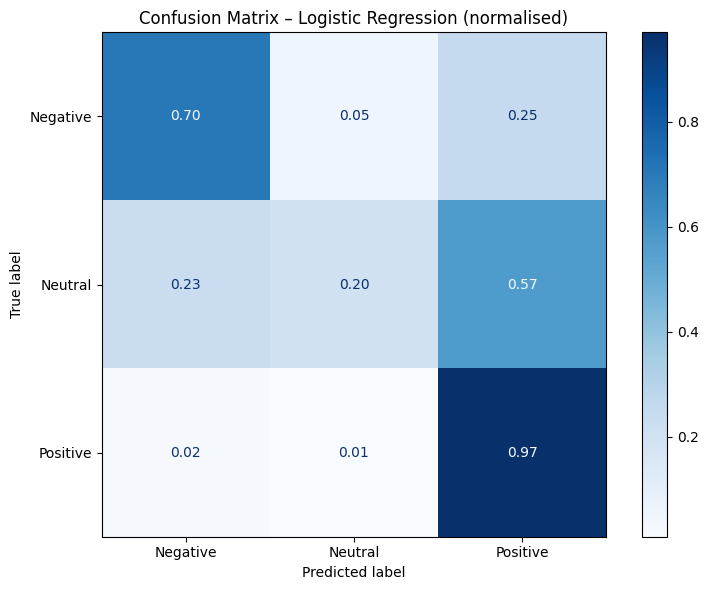

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_model.predict(X_test)


cm_counts = confusion_matrix(
    y_test,
    y_pred,
    labels=['negative', 'neutral', 'positive']
)

cm_norm = cm_counts.astype(float) / cm_counts.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(figsize=(8, 6))

disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round(cm_norm, 2),
    display_labels=['Negative', 'Neutral', 'Positive']
)

disp.plot(cmap='Blues', ax=ax, values_format='.2f')
ax.set_title('Confusion Matrix – Logistic Regression ')
plt.tight_layout()
plt.show()
